# **GET OUT OF THE WHICH MODEL MENTAL BLOCK**

This is a code-along followthrough of the article - "Get out of the "Which Model?" mental block" published here by Hetarth Chopra on -

In [62]:
'''Start with a quick Python installation of the library PyCaret'''
!pip install pycaret

In [63]:
''' let us import the usual required libraries'''
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

'''read the dataset'''
df = pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Wine-Quality-Predictions/master/winequality-red.csv")

In [64]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [65]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [66]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## PyCaret Classification

In [67]:
from pycaret.classification import *

##select only the features
x_columns = df.columns
x_columns = x_columns.drop(['quality'])

##initite the AutoML Experiment
exp_csf = setup(data = df, target = 'quality', transformation=True,
                polynomial_features=True, fix_imbalance=True,
                polynomial_degree=4, feature_selection=True)

,Description,Value
0,session_id,4574
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,"3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5"
4,Original Data,"(1599, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [68]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6166,0.7145,0.3769,0.6247,0.6142,0.4015,0.4042,0.979
et,Extra Trees Classifier,0.6067,0.7213,0.4256,0.6321,0.6113,0.3998,0.4039,0.601
rf,Random Forest Classifier,0.5898,0.7156,0.4200,0.6252,0.5987,0.3812,0.3855,0.868
gbc,Gradient Boosting Classifier,0.5549,0.6875,0.3645,0.6059,0.5729,0.3393,0.3436,3.787
dt,Decision Tree Classifier,0.5192,0.5898,0.3451,0.5623,0.5332,0.2828,0.2863,0.051
qda,Quadratic Discriminant Analysis,0.4584,0.6178,0.3535,0.5527,0.4831,0.2422,0.2540,0.033
knn,K Neighbors Classifier,0.4557,0.6200,0.4148,0.5746,0.4883,0.2537,0.2656,0.132
lda,Linear Discriminant Analysis,0.3950,0.6283,0.4025,0.5563,0.4439,0.1998,0.2130,0.037
lr,Logistic Regression,0.3887,0.6218,0.4013,0.5480,0.4375,0.1932,0.2059,0.406
svm,SVM - Linear Kernel,0.3378,0.0000,0.3602,0.5012,0.3755,0.1355,0.1465,0.077


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4574, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [69]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6339,0.0000,0.3153,0.6408,0.6347,0.4256,0.4279
1,0.6429,0.8244,0.5169,0.6732,0.6455,0.4479,0.4504
2,0.6875,0.8332,0.5783,0.6935,0.6901,0.5140,0.5145
3,0.5982,0.7537,0.4304,0.6069,0.5833,0.3520,0.3554
4,0.6429,0.7759,0.3677,0.6270,0.6282,0.4481,0.4520
5,0.5625,0.7755,0.2822,0.5769,0.5628,0.3232,0.3277
6,0.5714,0.7772,0.2843,0.5717,0.5706,0.3253,0.3261
7,0.6518,0.8365,0.3630,0.6576,0.6501,0.4691,0.4713
8,0.5982,0.8091,0.3127,0.6110,0.5992,0.3771,0.3812
9,0.5766,0.7597,0.3184,0.5881,0.5780,0.3331,0.3351


In [75]:
grid = {'learning_rate': [0.03, 0.1,0.15],
        'depth': [4, 6, 10,15],
        'l2_leaf_reg': [1, 3, 5, 7, 9,15]}
tuned_lgbm = tune_model(lgbm,custom_grid=grid)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6339,0.0000,0.3150,0.6345,0.6291,0.4234,0.4274
1,0.6250,0.8394,0.5092,0.6553,0.6243,0.4218,0.4265
2,0.6964,0.8407,0.5822,0.6965,0.6959,0.5298,0.5300
3,0.5714,0.7414,0.4195,0.5858,0.5592,0.3119,0.3149
4,0.6696,0.7832,0.3788,0.6512,0.6567,0.4830,0.4855
5,0.5804,0.7829,0.2983,0.5976,0.5835,0.3531,0.3568
6,0.6071,0.7870,0.3080,0.6048,0.6053,0.3813,0.3819
7,0.6429,0.8270,0.3598,0.6610,0.6448,0.4590,0.4629
8,0.6161,0.8111,0.3204,0.6397,0.6262,0.4076,0.4088
9,0.6216,0.7660,0.3362,0.6368,0.6216,0.3989,0.4020


In [76]:
pred_holdout = predict_model(tuned_lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5896,0.7827,0.3031,0.5823,0.5845,0.3632,0.3636


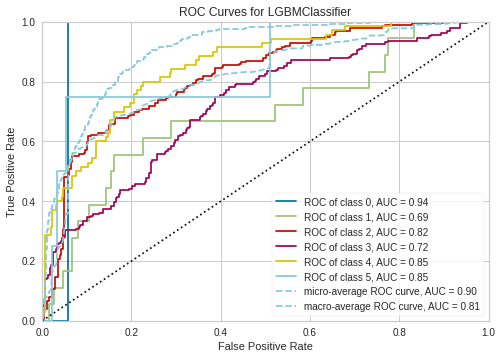

In [80]:
plot_model(estimator = tuned_lgbm, plot = 'auc')

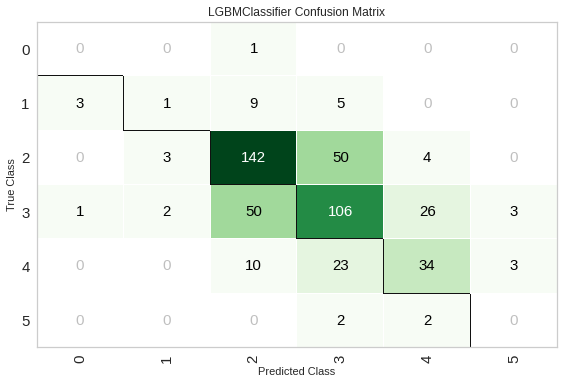

In [82]:
plot_model(estimator = tuned_lgbm, plot = 'confusion_matrix')

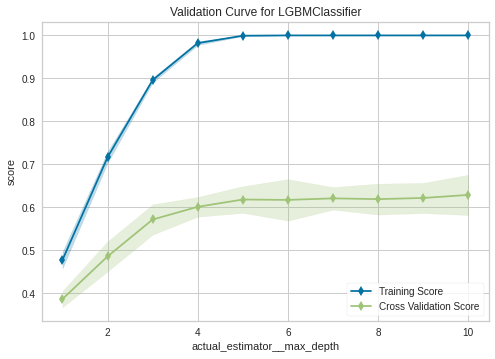

In [89]:
plot_model(tuned_lgbm, plot = 'vc')

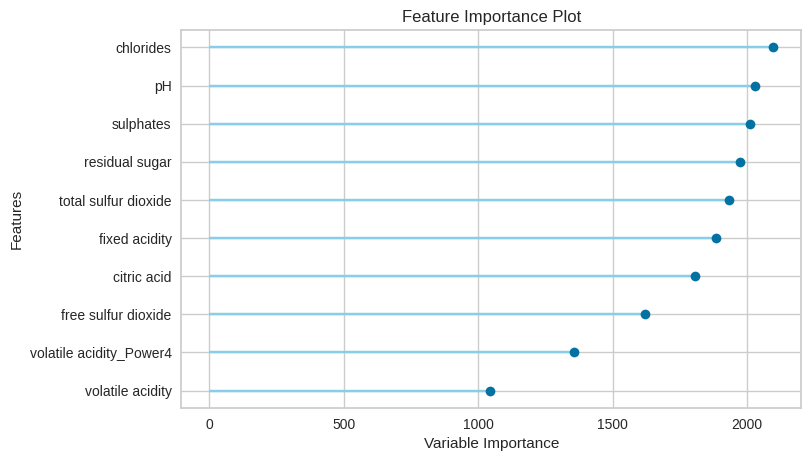

In [83]:
plot_model(estimator = tuned_lgbm, plot = 'feature')

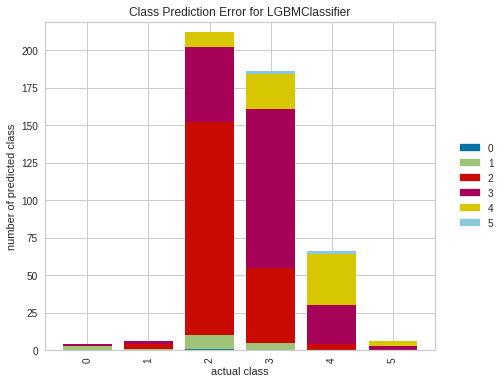

In [85]:
plot_model(tuned_lgbm, plot = 'error')

In [86]:
evaluate_model(tuned_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…